### Предварительная обработка данных

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
# Font size will be increased, background of figures will be white, grid will be present and size of plots will be increased

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [4]:
customer = pd.read_csv('olist_customers_dataset.csv', sep = ',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep = ',')
orders = pd.read_csv('olist_orders_dataset.csv', sep = ',')

olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

olist_orders_dataset.csv —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

In [5]:
customer.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [7]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

## Сколько у нас пользователей, которые совершили покупку только один раз? 

In [8]:
customers_orders = customer.merge(orders, on = 'customer_id') #соединяем инфо о клиентах и инфо о заказах
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [9]:
delivered_ord=customers_orders.query('order_status == "delivered"') #отобор доставленных заказов

In [10]:
one_order_count=delivered_ord\
        .groupby('customer_unique_id', as_index=False)\
        .agg({'order_id':'count'})\
        .query('order_id == 1')\
        .shape          #отбираем тех уникальных пользователей, у которых число заказов = 1  

print(f'{one_order_count[0]} пользователей, которые совершили покупку только один раз')

90557 пользователей, которые совершили покупку только один раз


# Сколько заказов в месяц в среднем не доставляется по разным причинам?


In [11]:
ordersdeliv = orders


In [12]:

ordersdeliv['order_purchase_timestamp'] = ordersdeliv['order_purchase_timestamp'].apply(pd.to_datetime)
ordersdeliv['order_purchase_timestamp'] = ordersdeliv['order_purchase_timestamp'].dt.normalize()
ordersdeliv['order_approved_at'] = ordersdeliv['order_approved_at'].apply(pd.to_datetime)
ordersdeliv['order_approved_at'] = ordersdeliv['order_approved_at'].dt.normalize()

In [13]:
nondeliv = ordersdeliv.query('order_status in ["unavailable", "canceled"]') #отберем все заказы со статусом "отменено" и "недоступно"
nondeliv.order_status.unique()                              #посмотрим на  статусы заказов
nondeliv = nondeliv.fillna (0) #заполним пропуски нулями

In [14]:
res=nondeliv.groupby([pd.Grouper(key='order_purchase_timestamp',freq='M'), "order_status"])\
    .agg({'order_id':'count'})\
    .groupby(['order_status']).agg({'order_id':'mean'}) 
res['Order_status'] = res.index

In [15]:
#разбиваем данные по месяцам
#считаем количество заказов с каждым статусом
#считаем среднее количество заказов с каждым статусом

In [16]:
res

,order_id,Order_status
order_status,,
canceled,26.041667,canceled
unavailable,29.000000,unavailable


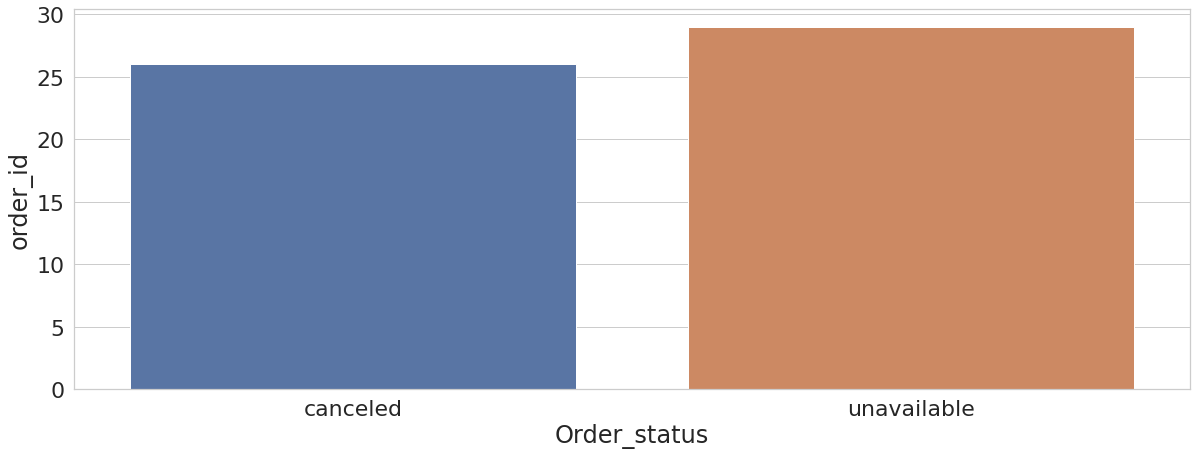

In [17]:
sns.barplot(data=res, x='Order_status', y='order_id')

In [18]:
res

,order_id,Order_status
order_status,,
canceled,26.041667,canceled
unavailable,29.000000,unavailable


# Определить, в какой день недели товар чаще всего покупается.

Для начала определим понятие "покупка", в данном датасете я подразумиваю под покупкой все товары со статусом 'delivered', так как все остальные статусы заказов не отражают конечного состояния заказа. Также заказы со статусом 'delivered' - 97% всех заказов, следовательно статистически значимые выводы о днях неделях покупок можно будут максимально достоверные для данной выборки.

In [19]:
items_by_orders=orders.merge(order_items, on = 'order_id') #соединяю таблицу заказов с таблицей описания заказов

In [20]:
delivered_items=items_by_orders.query('order_status == "delivered"')  #отбираю заказы со статусом "доставлено"

In [21]:
delivered_items.dtypes #смотрим на типы данных

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
dtype: object

In [22]:
delivered_items.order_item_id.unique() #смотрим на уникальные id товаров

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [23]:
deliv_items_by_days = delivered_items[['order_item_id', 'order_purchase_timestamp']]

deliv_items_by_days = deliv_items_by_days.dropna() #сбросим заказы без даты создания заказа
deliv_items_by_days['weekdays'] = deliv_items_by_days['order_purchase_timestamp'].dt.weekday

In [24]:
deliv_items_by_days.groupby('order_item_id').agg({'order_purchase_timestamp':'count'})
#посмотрим на количество товаров по их типам

,order_purchase_timestamp
order_item_id,
1,96478
2,9635
3,2243
4,937
5,442
6,249
7,58
8,36
9,28


In [25]:
with_weekdays=deliv_items_by_days.sort_values(by = 'order_purchase_timestamp')


In [26]:
bb=with_weekdays.groupby(['weekdays','order_item_id'],as_index=False)\
    .agg({'order_purchase_timestamp':'count'}).\
    query('order_purchase_timestamp >= 700') #отделим типы товаров с наибольшим числом от остальных, для наглядности

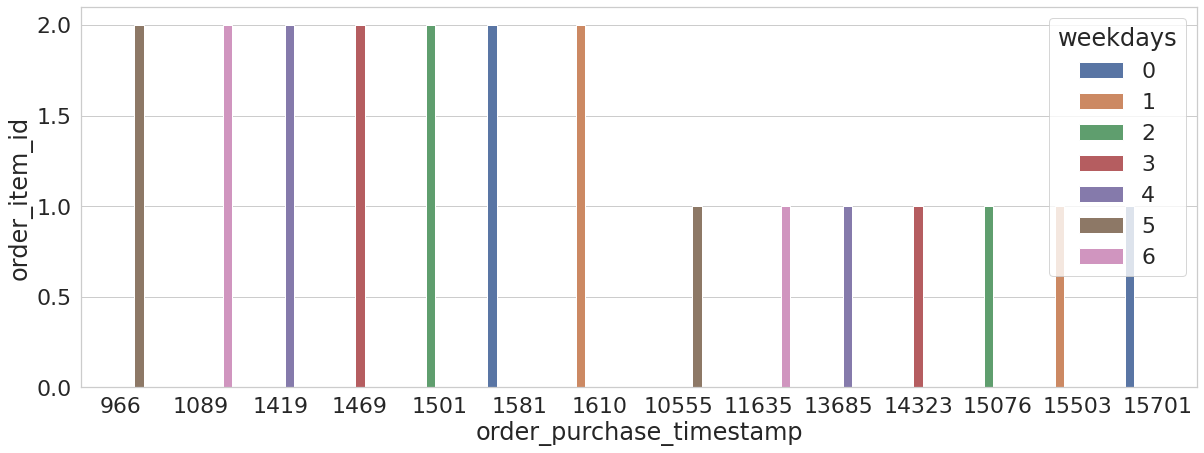

In [27]:
sns.barplot(data = bb, y='order_item_id', x='order_purchase_timestamp', hue='weekdays')

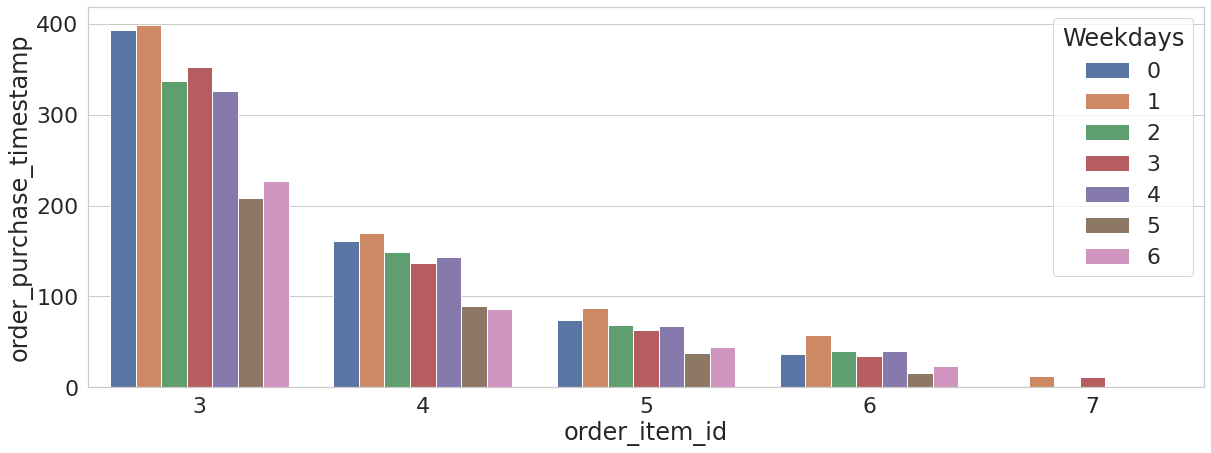

In [28]:
cc=with_weekdays.groupby(['weekdays','order_item_id'],as_index=False)\
    .agg({'order_purchase_timestamp':'count'})\
    .query(' 10 < order_purchase_timestamp < 750') #отделим типы товаров со средним числом от остальных, для наглядности
sns.barplot(data = cc, x='order_item_id', y='order_purchase_timestamp', hue='weekdays')
plt.legend(loc='upper right', title = "Weekdays") 

In [29]:
nn=with_weekdays.groupby(['weekdays','order_item_id'],as_index=False)\
    .agg({'order_purchase_timestamp':'count'})\
    .query('order_purchase_timestamp < 10') #отделим типы товаров с наименьшим числом от остальных, для наглядности

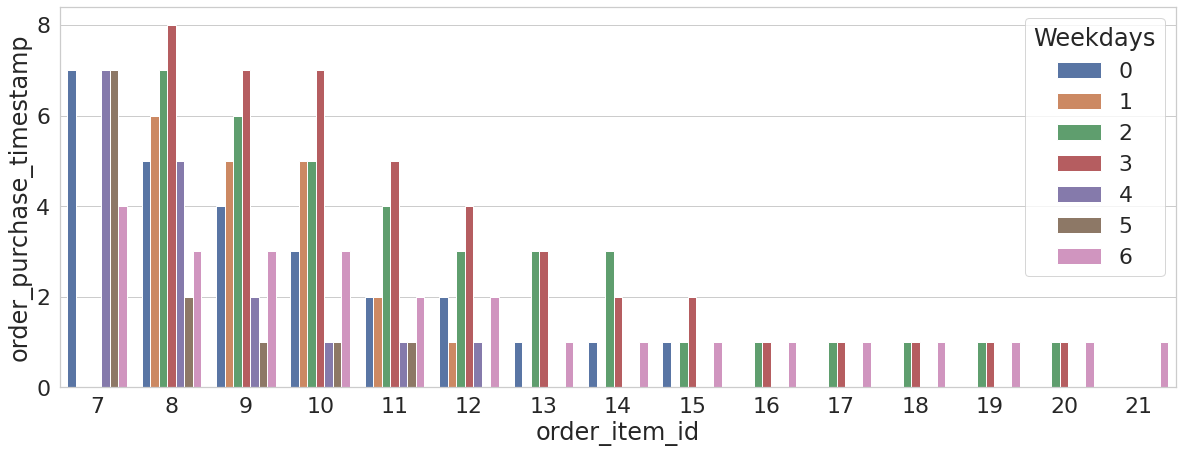

In [30]:
sns.barplot(data = nn, x='order_item_id', y='order_purchase_timestamp', hue='weekdays')
plt.legend(loc='upper right', title = "Weekdays") 


## Товары 1, 2, 3, 4, 5 чаще всего преобретают во вторник.
## Товар 6 чаще всего преобретают в четверг.
## Товары 7, 8, 9, 10 чаще всего преобретают в пятницу.
## Для остальных товаров не получится выделить день недели с наибольшими продажами, так как число наблюдений для них очень мало.

## Сколько у каждого из пользователей в среднем покупок в неделю?

In [31]:
items_by_orders_2=orders.merge(order_items, on = 'order_id') #соединяю таблицу заказов с таблицей описания заказов
items_by_orders_3 = items_by_orders_2. merge(customer, on = 'customer_id')
delivered_items_2=items_by_orders_3.query('order_status == "delivered"')  #отбираю заказы со статусом "доставлено"



In [32]:
delivered_items_2['months']= delivered_items.order_approved_at.dt.month_name()
# переводим дату подтверждения заказа в формат названия месяца

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
delivered_items_2['days_in_month'] = delivered_items_2['order_approved_at']\
                            .apply(lambda x: pd.Period(x, freq='S').days_in_month)      

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
delivered_items_2['weeks'] = (delivered_items_2.days_in_month / 7).round(2)
# вычисяем кол-во недель в месяце

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
delivered_items_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,months,days_in_month,weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,31.0,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,31.0,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,31.0,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November,30.0,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February,28.0,4.00


In [36]:
count_orders=delivered_items_2.groupby(['months','customer_unique_id'], as_index=False) \
    .agg({'order_status':'count'})
# считаем количество заказов в месяц для каждого опльзователя


In [37]:

count_orders['avg_orders']= (count_orders.order_status / delivered_items_2.weeks).round(2)
# получаем среднее количество покупко в неделю по пользователю

# Ответ :

In [38]:
count_orders 

,months,customer_unique_id,order_status,avg_orders
0,April,0004bd2a26a76fe21f786e4fbd80607f,1,0.23
1,April,00050ab1314c0e55a6ca13cf7181fecf,1,0.23
2,April,000949456b182f53c18b68d6babc79c1,1,0.23
3,April,0011805441c0d1b68b48002f1d005526,1,0.23
4,April,00191a9719ef48ebb5860b130347bf33,1,0.25
...,...,...,...,...
95133,September,ffb2d91ed21974026a30f6ec0b3c934f,1,0.23
95134,September,ffcf1dc25f2222aea1aef48841f20f3a,1,0.23
95135,September,ffdffea8a4b04f14987bfef2a2287fa9,1,0.23
95136,September,ffeefd086fc667aaf6595c8fe3d22d54,1,0.23


## На графике изображено распределение средних покупок по месяцам для всех пользователей

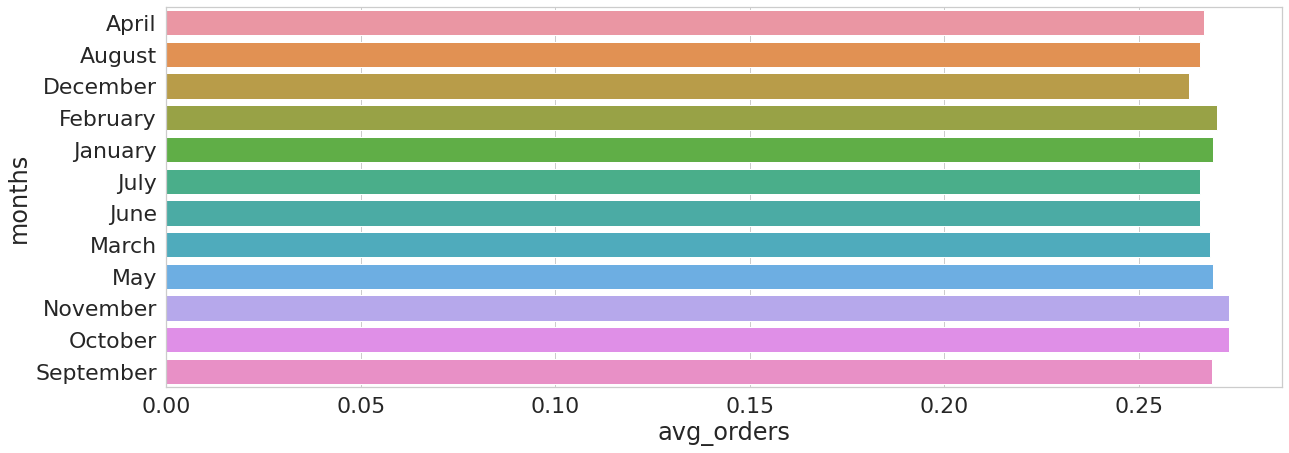

In [39]:
month_avg_ord=count_orders.groupby(['months'], as_index=False).agg({'avg_orders':'mean'})
sns.barplot(data = month_avg_ord, x='avg_orders', y = 'months')

# Выполните когортный анализ пользователей на 3 месяц.

In [40]:
clients_data_ord=orders.merge(customer, on = 'customer_id') #соединяю таблицу заказов с таблицей описания заказов


In [41]:
clients_data_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [42]:
clients_data_ord.order_purchase_timestamp = clients_data_ord.order_purchase_timestamp.dt.to_period('M') 
#перевожу дату к году и месяцу

In [43]:
clients_cogort = clients_data_ord[['customer_unique_id','order_id','order_purchase_timestamp']] 
clients_cogort = clients_cogort.sort_values('order_purchase_timestamp') 
clients_cogort.head() #создаю новую таблицу и отделяю туда нужные мне колонки

,customer_unique_id,order_id,order_purchase_timestamp
10071,009b0127b727ab0ba422f6d9604487c7,809a282bbd5dbcabb6f2f724fca862ec,2016-09
4396,4854e9b3feff728c13ee5fc7d1547e92,e5fa5a7210941f7d56d0208e4e071d35,2016-09
30710,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09
4541,b7d76e111c89f7ebf14761390f0f7d17,2e7a8482f6fb09756ca50c10d7bfc047,2016-09
38913,b9c47942414b4b3f08a3ae85f5c7e4d7,1a2b0033f0b7a3116f00594ec5524344,2016-10


### Принимаю, что любой статус заказа - есть действие пользователя, а следовательно к сервису он обратился, а значит можно учитывать его при рассчете retantion

In [44]:
 first_date = clients_cogort.groupby('customer_unique_id',as_index=False) \
    .agg({'order_purchase_timestamp':'first'}) #нахожу дату первой покупки

In [45]:
clients_cogort = clients_cogort.merge(first_date, how='inner',on='customer_unique_id') 
#cоединяю две таблице по колонке id клиента

In [46]:
clients_cogort = clients_cogort.rename(columns={'order_purchase_timestamp_x':'order_date','order_purchase_timestamp_y':'first_order_date'})
#переиминовываю колонки что бы избавится от _x и _y

In [48]:
clients_cogort = clients_cogort.groupby(['first_order_date','order_date']) \
    .agg({'customer_unique_id':'count'})

def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

clients_cogort = clients_cogort.groupby(level=0).apply(cohort_period)
 #выделяю когорты

In [49]:
clients_cogort = clients_cogort.pivot_table(columns='cohort_period', index = 'first_order_date',values = 'customer_unique_id')
#получаю итоговую таблицу 

In [50]:
base = clients_cogort[1]
#шаг итерации для нахождения ответа на поставленный вопрос

In [51]:
 retention = clients_cogort.divide(base, axis=0).round(5)

In [52]:
 retention[retention[3] == retention[3].max()].index

PeriodIndex(['2017-05'], dtype='period[M]', name='first_order_date', freq='M')

In [79]:
ur_style = (retention
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style


cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_order_date,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,
2016-10,100.00%,0.31%,0.31%,0.31%,0.31%,0.31%,0.31%,0.62%,0.62%,,,,,,,,,
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,
2017-01,100.00%,0.38%,0.25%,0.12%,0.38%,0.12%,0.50%,0.12%,0.12%,0.38%,0.12%,0.75%,0.38%,0.12%,0.12%,0.25%,0.38%,0.12%
2017-02,100.00%,0.22%,0.28%,0.11%,0.39%,0.11%,0.22%,0.17%,0.17%,0.22%,0.11%,0.28%,0.17%,0.17%,0.11%,0.06%,0.06%,0.28%
2017-03,100.00%,0.52%,0.37%,0.45%,0.34%,0.15%,0.15%,0.30%,0.34%,0.07%,0.37%,0.15%,0.22%,0.11%,0.15%,0.22%,0.07%,0.15%
2017-04,100.00%,0.63%,0.25%,0.21%,0.34%,0.25%,0.38%,0.29%,0.29%,0.17%,0.25%,0.08%,0.08%,0.04%,0.08%,0.08%,0.25%,
2017-05,100.00%,0.52%,0.57%,0.38%,0.30%,0.38%,0.46%,0.16%,0.24%,0.35%,0.24%,0.33%,0.27%,0.03%,0.22%,0.30%,,
2017-06,100.00%,0.47%,0.38%,0.41%,0.25%,0.38%,0.38%,0.22%,0.12%,0.22%,0.31%,0.34%,0.16%,0.12%,0.22%,,,


# Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [55]:
#объединим все таблицы
clord=orders.merge(customer, on = 'customer_id')
all_data = clord.merge(order_items, on='order_id')

In [56]:
#отбираю колонки со статусом доставлено
#считаем сумму по каждому заказу
RFM = all_data.loc[all_data.order_approved_at.notna()].query('order_status == "delivered"') \
            .groupby(['customer_unique_id', 'order_purchase_timestamp', 'order_id'], as_index=False) \
            .agg({'price': 'sum'})

In [57]:
RFM.head()

,customer_unique_id,order_purchase_timestamp,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,e22acc9c116caa3f2b7121bbb380d08e,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,3594e05a005ac4d06a72673270ef9ec9,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10,b33ec3b699337181488304f362a6b734,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,41272756ecddd9a9ed0180413cc22fb6,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,d957021f1127559cd947b62533f484f7,180.00


In [58]:
#найдем последнюю дату покупки
final_day = RFM['order_purchase_timestamp'].max() + datetime.timedelta(days=1)
#найдем временной период наблюдения в днях и добавим по 2 дня что бы все наблюдения вошли в диапазон
timedelta = (final_day - RFM['order_purchase_timestamp'].min()) + datetime.timedelta(days=2)
timedelta

Timedelta('716 days 00:00:00')

In [59]:
Time = 716

In [60]:
#считаем дни от времени заказа до конца наблюдения
RFM['days'] = RFM['order_purchase_timestamp'].apply(lambda x: (final_day - x).days)

In [65]:
#проведем рассчет метрик
#recency - время от последней покупки пользователя до последней даты
#frequency - суммарное количество покупок у пользователя за весь период наблюдения

RFM_final = RFM.groupby('customer_unique_id') \
            .agg({'days': lambda x: x.min(), \
                  'order_purchase_timestamp': lambda x: len([d for d in x if d >= final_day - datetime.timedelta(days=Time)])}) \
            .reset_index() \
            .rename(columns={'days': 'recency', 'order_purchase_timestamp': 'frequency'})

In [66]:
#monetary - сумма покупок каждого пользователя за весь период

RFM_final['monetary'] = RFM.groupby('customer_unique_id', as_index=False) \
                    .agg({'price': 'sum'}) \
                    .rename(columns={'price': 'monetary'})['monetary']


### Посмотрим на распределение метрик

count    93345.000000
mean       238.433703
std        152.557603
min          1.000000
25%        115.000000
50%        219.000000
75%        347.000000
max        714.000000
Name: recency, dtype: float64

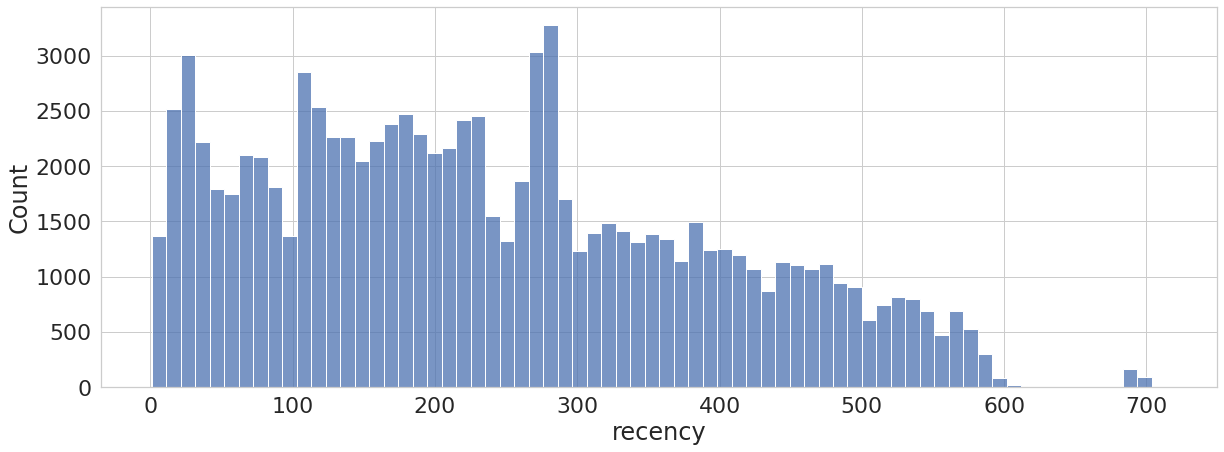

In [67]:

sns.histplot(RFM_final.recency)
RFM_final.recency.describe()

## 1 группа - Пользователи с recency меньше 200
## 2 группа - Пользователи с recency от 200 до 400
## 3 группа - Пользователи с recency больше 400

count    93345.000000
mean         1.033414
std          0.209088
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

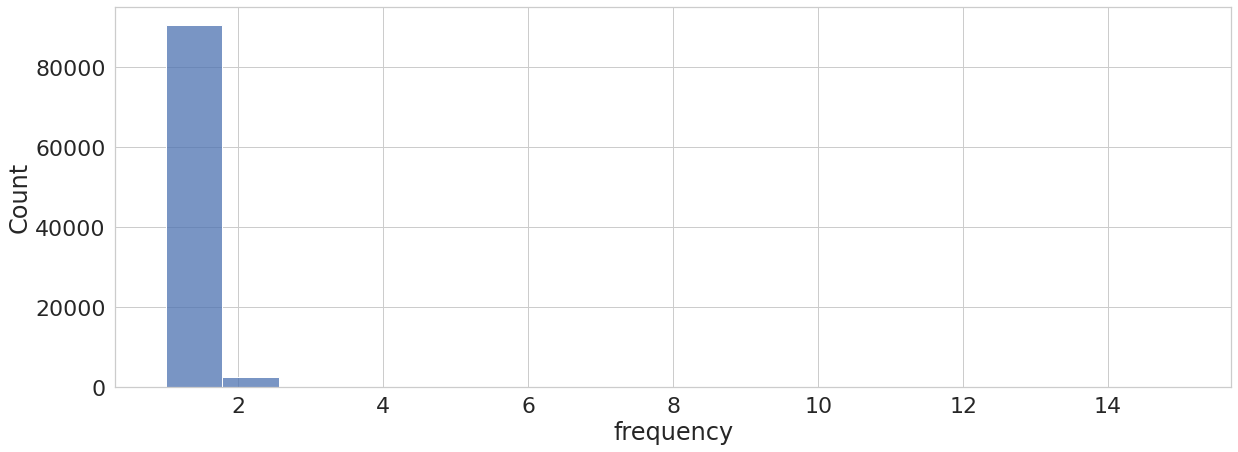

In [68]:
sns.histplot(RFM_final.frequency)
RFM_final.frequency.describe()

## Преимущественно пользователи делали по 1 заказу, разобьем пользователей на 3 группы:
## 1 группа - Пользователи сделали 1 заказ
## 2 группа - Пользователи сделали 2 заказа
## 3 группа - Пользователи с делали более 2х заказов

count    93345.000000
mean       141.623308
std        215.705007
min          0.850000
25%         47.650000
50%         89.760000
75%        154.750000
max      13440.000000
Name: monetary, dtype: float64

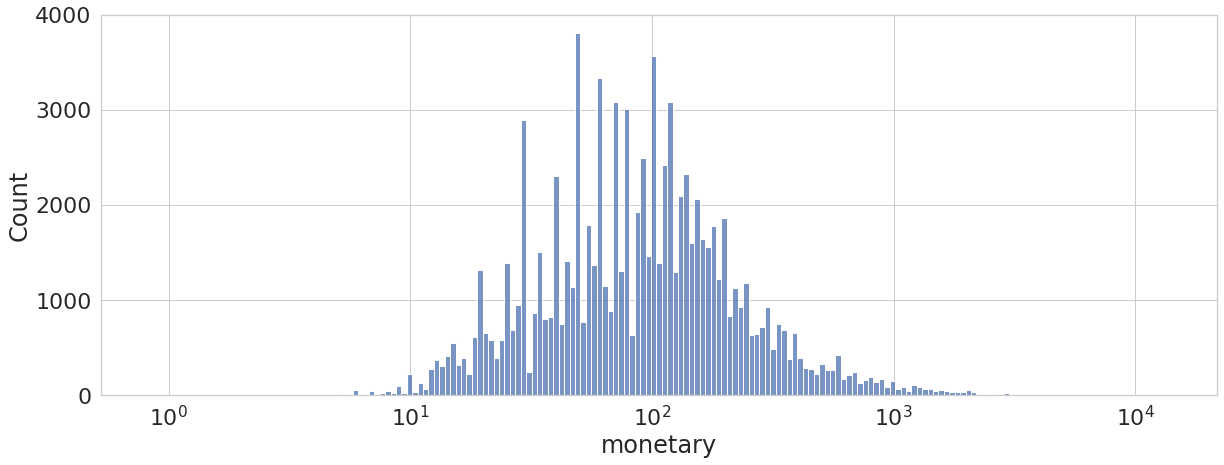

In [69]:
sns.histplot(RFM_final.monetary, log_scale=True)
RFM_final.monetary.describe()

In [70]:
log_monetery = RFM_final.monetary.apply(lambda x: np.log(x))
log_monetery.describe()

count    93345.000000
mean         4.468750
std          0.937828
min         -0.162519
25%          3.863883
50%          4.497139
75%          5.041811
max          9.505991
Name: monetary, dtype: float64

## Для большей наглядности прологарифмируем значения. Данное распределение напоминает нормальное, давайте разделим пользователей на 3 группы по квантилям логарифмированных значений:
## 1 группа - сумма до квантиля 0.25
## 2 группа - сума от квантиля 0.25 до 0.75
## 3 группа - сума от квантиля 0.75

### Выделим группы

In [71]:
#функция для определния пользователя в группу monetary
def m_rate(x):
    a = np.log(x)
    if a <= 3.863883:
        return '1'
    elif 3.863883 < a <= 5.041811:
        return '2'
    else:
        return '3'
#функция для определния пользователя в группу frequency
def f_rate(x):
    if x == 1:
        return '1'
    elif x==2:
        return '2'
    else:
        return '3'
#функция для определния пользователя в группу recency
def r_rate(x):
    if x <= 200:
        return '1'
    elif 200 < x <= 400:
        return '2'
    else:
        return '3'
    

In [72]:
# Применяем функции для создания столбцов с оценками
RFM_final['R'] = RFM_final['recency'].apply(lambda x: r_rate(x))
RFM_final['F'] = RFM_final['frequency'].apply(lambda x: f_rate(x))
RFM_final['M'] = RFM_final['monetary'].apply(lambda x: m_rate(x))

In [73]:
#получаем код RFM
RFM_final['RFM_score'] = RFM_final['R'] + RFM_final['F'] + RFM_final['M']

In [74]:
#создадим функцию деления на сегменты
def segments(x):

        if x[0] == '1':
            a = 'купил недавно'
        elif x[0] == '2':
            a = 'купил средней давности'
        else:
            a = 'купил давно'

        if x[1] == '1':
            b = '1 раз'
        elif x[1] == '2':
            b = '2 разa'
        else:
            b = 'более 2 раз'

        if x[2] == '1':
            c = 'мало потратил'
        elif x[2] == '2':
            c = 'средне потратил'
        else:
            c = 'много потратил'
        return a +' '+ b + ' ' + c

In [75]:
RFM_final['segment'] = RFM_final.RFM_score.apply(segments)

In [76]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,20)}
        )

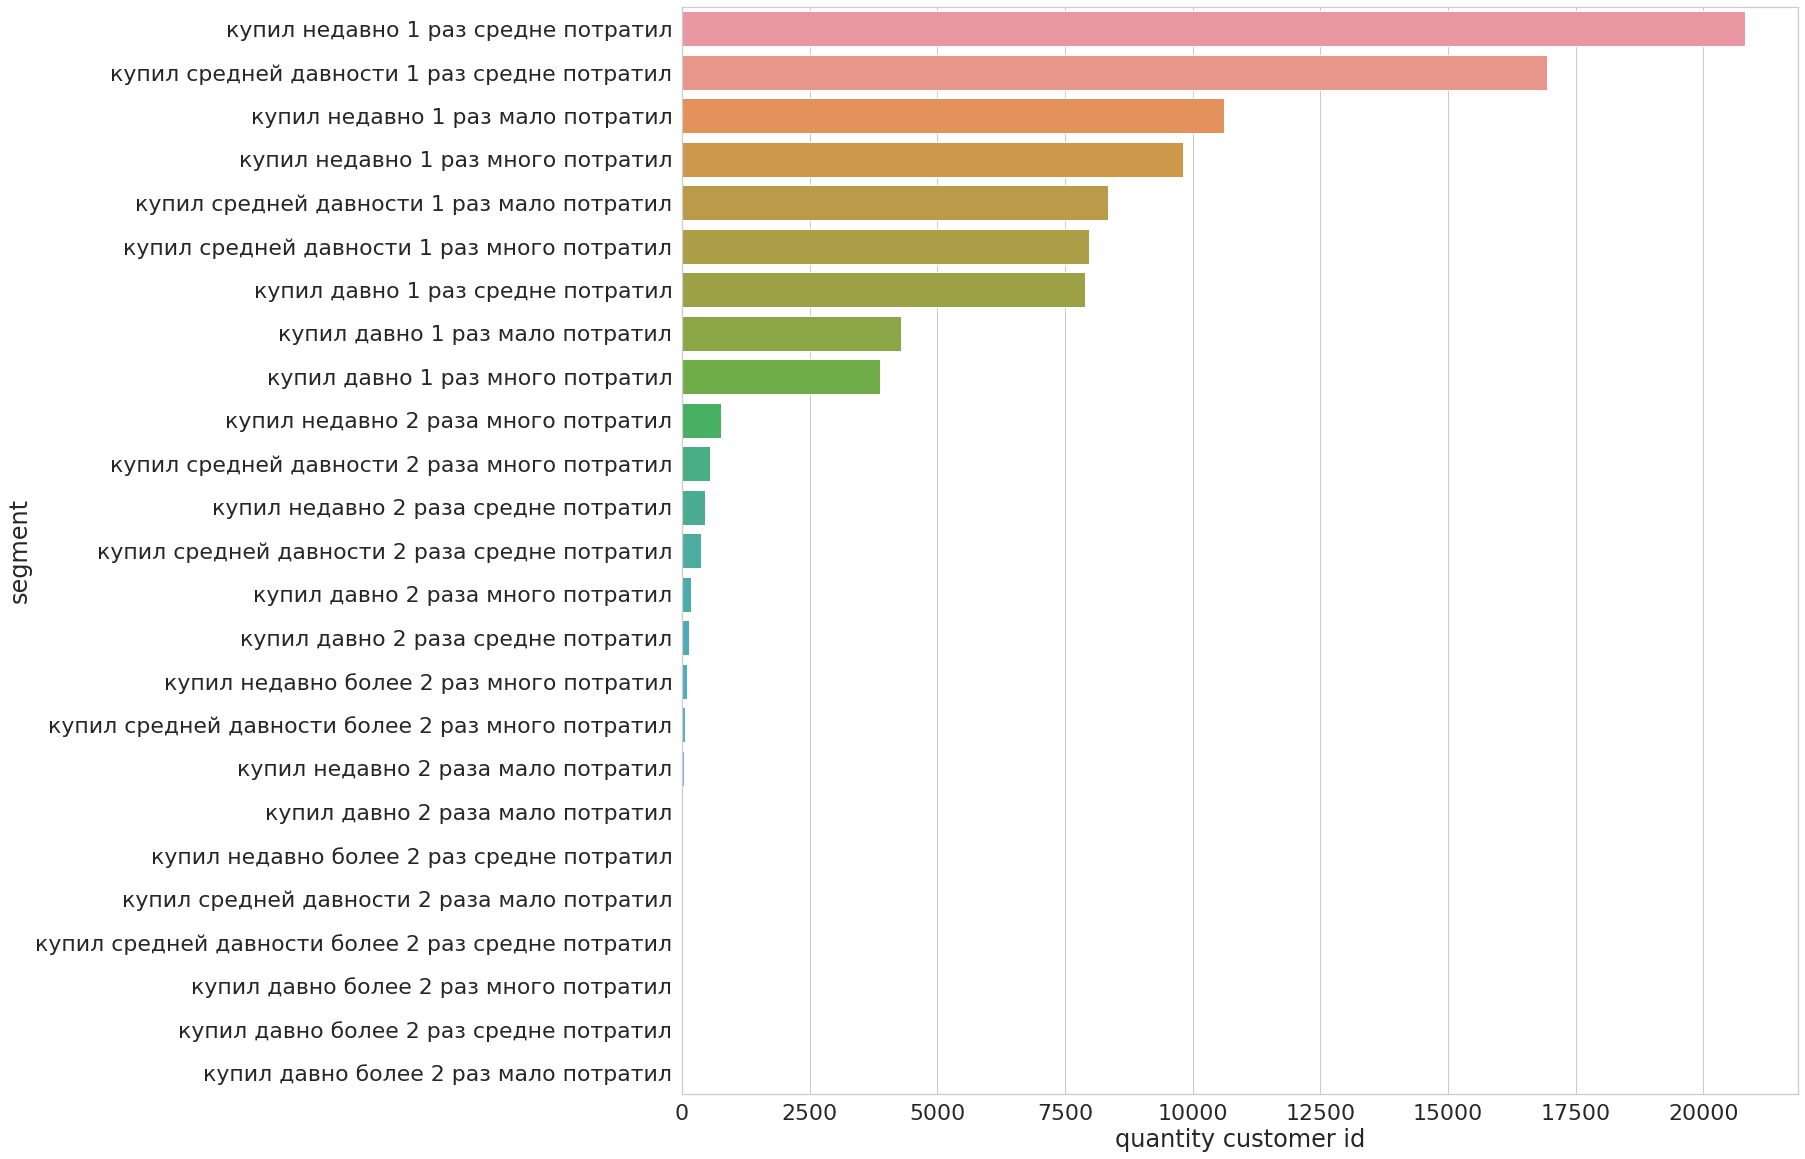

In [81]:
# Отберем и визуализируем результат
true_final=RFM_final.segment.value_counts().reset_index()
sns.barplot(data = true_final, x='segment', y='index')
plt.xlabel('quantity customer id')
plt.ylabel('segment');


# В результате кластеризации пользователей выявили доминирующий класс пользователей, которые купили товар всего один раз, потартил среднее количество денег, но сделал это недавно.
# Следующий сегмент пользователей - те кто делал покупку сравнительно давно
# Третий по многочисленности сегмент пользователей - те кто купил недавно, совершил одну покупку и потратил мало денег в сервисе